# Data wrangling on AWS

Install and import the necessary python packages

In [1]:
!pip install awswrangler
!pip install pandas
!pip install sklearn
!pip install seaborn

import awswrangler as wr
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached awswrangler-2.16.1-py3-none-any.whl (248 kB)
  Using cached pg8000-1.29.1-py3-none-any.whl (34 kB)
  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
  Using cached opensearch_py-1.1.0-py2.py3-none-any.whl (207 kB)
  Using cached requests_aws4auth-1.1.2-py2.py3-none-any.whl (24 kB)
  Using cached backoff-2.1.2-py3-none-any.whl (14 kB)
  Using cached jsonpath_ng-1.5.3-py3-none-any.whl (29 kB)
  Using cached redshift_connector-2.0.908-py3-none-any.whl (112 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.8 MB/s eta 0:00:0000:0100:01
  Using cached progressbar2-4.0.0-py2.py3-none-any.whl (26 kB)
  Using cached gremlinpython-3.6.1-py2.py3-none-any.whl (73 kB)
  Using cached botocore-1.27.60-py3-none-any.whl (9.1 MB)
  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)
  Using cached aenum-3.1.11-py3-none-any.whl (131 kB)
  Using cached scramp-1.4.1-py3-none-any.whl (8

Print their version

In [2]:
print(wr.__version__)
print(pd.__version__)
print(sk.__version__)
print(matplotlib.__version__)

2.16.1
1.3.4
1.0.1
3.5.0


Import the data

In [3]:
input_path = "s3://landing-raw-wateringsensors-123"
output_path = "s3://staging-clean-wateringsensors-123"
df = wr.s3.read_csv(input_path)
df

,plantRow,detectedValueTypeId,yy,xx,value,unit,timestamp,zz
0,T1 basso,GRND_WATER_G,-20.0,25.0,-21.616472,cbar,1628951453,NaN
1,T1 basso,GRND_WATER_G,-20.0,50.0,-113.354793,cbar,1628950550,NaN
2,T1 basso,GRND_WATER_G,-20.0,0.0,-21.041212,cbar,1628947848,0.0
3,T1 basso,GRND_WATER_G,-20.0,0.0,-21.328847,cbar,1628948747,0.0
4,T1 basso,GRND_WATER_G,-20.0,25.0,-130.458021,cbar,1628657108,NaN
...,...,...,...,...,...,...,...,...
29059,T1 basso,GRND_WATER_G,-60.0,0.0,-74.186077,cbar,1627102804,0.0
29060,T1 basso,GRND_WATER_G,-60.0,25.0,-209.033680,cbar,1627101007,NaN
29061,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101905,NaN
29062,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101007,NaN


Show some statistics

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yy,28512.0,-4.240741e+01,16.099585,-6.000000e+01,-6.000000e+01,-4.000000e+01,-2.000000e+01,-2.000000e+01
xx,28512.0,3.875000e+01,29.660046,0.000000e+00,1.875000e+01,3.750000e+01,5.750000e+01,8.000000e+01
value,29064.0,-1.821906e+02,506.803601,-9.885007e+02,-3.890425e+02,-1.446921e+02,-2.430051e+01,3.641000e+03
timestamp,29064.0,1.627720e+09,757387.611829,1.626307e+09,1.627103e+09,1.627749e+09,1.628371e+09,1.628985e+09
zz,14256.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29064 entries, 0 to 29063
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   plantRow             29064 non-null  object 
 1   detectedValueTypeId  29064 non-null  object 
 2   yy                   28512 non-null  float64
 3   xx                   28512 non-null  float64
 4   value                29064 non-null  float64
 5   unit                 29064 non-null  object 
 6   timestamp            29064 non-null  int64  
 7   zz                   14256 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


Let's plot the distribution of the data

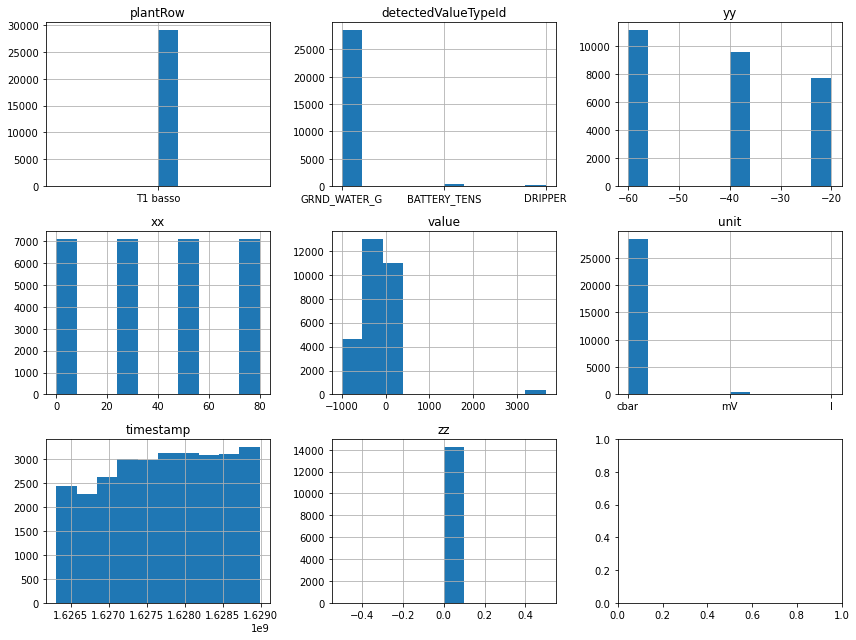

In [6]:
cols = 3
rows = math.ceil(len(df.columns) / cols)

fig, axs = fig, ax = plt.subplots(cols, rows, figsize = (4 * rows, 3 * cols))
i = 0

for x in df.columns:
    ax = axs[int(i / cols)][i % cols]
    # df[x].value_counts().plot(kind="bar", ax=ax)
    df[x].hist(ax=ax)
    ax.set_title(x)
    i += 1

fig.tight_layout()

The `zz` column contains missing values and a single non-null value (`0`), what should we do?

In [7]:
if "zz" in df.columns:
    df = df.drop(columns=["zz"])
df

,plantRow,detectedValueTypeId,yy,xx,value,unit,timestamp
0,T1 basso,GRND_WATER_G,-20.0,25.0,-21.616472,cbar,1628951453
1,T1 basso,GRND_WATER_G,-20.0,50.0,-113.354793,cbar,1628950550
2,T1 basso,GRND_WATER_G,-20.0,0.0,-21.041212,cbar,1628947848
3,T1 basso,GRND_WATER_G,-20.0,0.0,-21.328847,cbar,1628948747
4,T1 basso,GRND_WATER_G,-20.0,25.0,-130.458021,cbar,1628657108
...,...,...,...,...,...,...,...
29059,T1 basso,GRND_WATER_G,-60.0,0.0,-74.186077,cbar,1627102804
29060,T1 basso,GRND_WATER_G,-60.0,25.0,-209.033680,cbar,1627101007
29061,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101905
29062,T1 basso,GRND_WATER_G,-60.0,50.0,-352.458317,cbar,1627101007


What else can we do?

- Do we need to store the `plantRow`?
- Do the sensors from the same `detectedValueTypeId` share the same `unit`?
- Do we care about all the sensor types (i.e., `detectedValueTypeId`)?

In [8]:
df.groupby(["detectedValueTypeId"]).nunique()

,plantRow,yy,xx,value,unit,timestamp
detectedValueTypeId,,,,,,
BATTERY_TENS,1,0,0,7,1,391
DRIPPER,1,0,0,34,1,153
GRND_WATER_G,1,3,4,2362,1,6668


Drop the "useless" columns

In [9]:
df = df.drop(["plantRow", "unit"], axis=1)
df

,detectedValueTypeId,yy,xx,value,timestamp
0,GRND_WATER_G,-20.0,25.0,-21.616472,1628951453
1,GRND_WATER_G,-20.0,50.0,-113.354793,1628950550
2,GRND_WATER_G,-20.0,0.0,-21.041212,1628947848
3,GRND_WATER_G,-20.0,0.0,-21.328847,1628948747
4,GRND_WATER_G,-20.0,25.0,-130.458021,1628657108
...,...,...,...,...,...
29059,GRND_WATER_G,-60.0,0.0,-74.186077,1627102804
29060,GRND_WATER_G,-60.0,25.0,-209.033680,1627101007
29061,GRND_WATER_G,-60.0,50.0,-352.458317,1627101905
29062,GRND_WATER_G,-60.0,50.0,-352.458317,1627101007


Drop the useless rows

In [10]:
df = df[df["detectedValueTypeId"] == "GRND_WATER_G"]
df = df.drop(["detectedValueTypeId"], axis=1)
df

,yy,xx,value,timestamp
0,-20.0,25.0,-21.616472,1628951453
1,-20.0,50.0,-113.354793,1628950550
2,-20.0,0.0,-21.041212,1628947848
3,-20.0,0.0,-21.328847,1628948747
4,-20.0,25.0,-130.458021,1628657108
...,...,...,...,...
29059,-60.0,0.0,-74.186077,1627102804
29060,-60.0,25.0,-209.033680,1627101007
29061,-60.0,50.0,-352.458317,1627101905
29062,-60.0,50.0,-352.458317,1627101007


Take a better look at the sensor data over time

/tmp/ipykernel_18567/160413743.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d %H:%M:%S') for tm in ax.get_xticks()], rotation = 45)


[Text(1626000000.0, 0, '2021-07-11 10:40:00'),
 Text(1626500000.0, 0, '2021-07-17 05:33:20'),
 Text(1627000000.0, 0, '2021-07-23 00:26:40'),
 Text(1627500000.0, 0, '2021-07-28 19:20:00'),
 Text(1628000000.0, 0, '2021-08-03 14:13:20'),
 Text(1628500000.0, 0, '2021-08-09 09:06:40'),
 Text(1629000000.0, 0, '2021-08-15 04:00:00'),
 Text(1629500000.0, 0, '2021-08-20 22:53:20')]

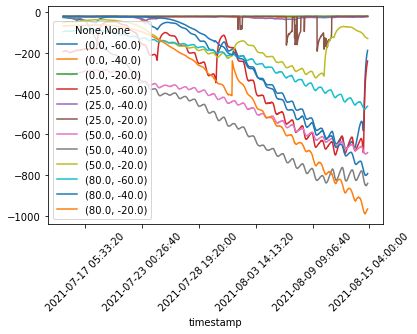

In [11]:
fig, ax = plt.subplots()
for key, grp in df.sort_values(by=["timestamp"]).groupby(['xx', 'yy']):
    ax = grp.plot(ax=ax, kind='line', x='timestamp', y='value', label=key)

ax.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d %H:%M:%S') for tm in ax.get_xticks()], rotation = 45)

Snapshots of sensor data, is it everything normal?

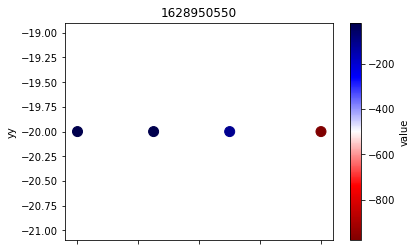

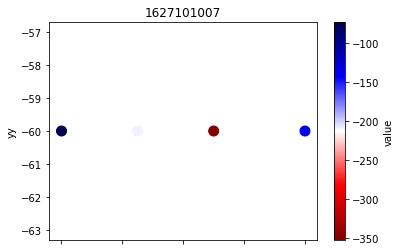

In [12]:
for i, timestamp in enumerate([1628950550, 1627101007]):
    df[df["timestamp"] == timestamp].plot.scatter(x='xx', y='yy', c='value', cmap='seismic_r', s=100, title=timestamp)

What if we bin our data hourly?

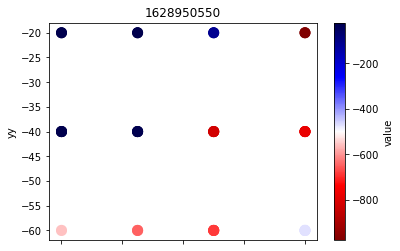

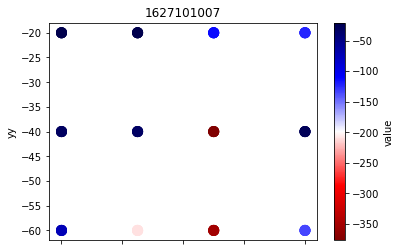

In [13]:
for i, timestamp in enumerate([1628950550, 1627101007]):
    df[df["timestamp"].apply(lambda x: int(x / (60 * 60))) == int(timestamp / (60 * 60))].plot.scatter(x='xx', y='yy', c='value', cmap='seismic_r', s=100, title=timestamp)

So we can bin our data hourly, and create derived attributes useful for posterior analysis.
Finally, save the data frame back to s3.

In [14]:
df["timestamp"] = df["timestamp"].apply(lambda x: int(x / 3600) * 3600)  # bin the time by hours
df = df.groupby(["timestamp", "xx", "yy"])["value"].mean().reset_index()
df["hour"] = [pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d %H') for tm in df["timestamp"]]
df["date"] = [pd.to_datetime(tm, unit='s').strftime('%Y-%m-%d') for tm in df["timestamp"]] 
df["month"] = [pd.to_datetime(tm, unit='s').strftime('%Y-%m') for tm in df["timestamp"]] 
df["year"] = [pd.to_datetime(tm, unit='s').strftime('%Y') for tm in df["timestamp"]] 

# wr.s3.to_csv(df=df, path=output_path + "/v1.csv")
wr.s3.to_csv(df=df, path=output_path + "/v1.csv", index=False)

df["sensor"] = df.apply(lambda x: "(" + str(x["xx"]) + ", " + str(x["yy"]) + ")", axis=1)
df = df.rename({"xx": "dist", "yy": "depth"}, axis=1)

wr.s3.to_csv(df=df, path=output_path + "/v2.csv", index=False)
df

,timestamp,dist,depth,value,hour,date,month,year,sensor
0,1626307200,0.0,-60.0,-27.366967,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -60.0)"
1,1626307200,0.0,-40.0,-21.041212,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -40.0)"
2,1626307200,0.0,-20.0,-21.041212,2021-07-15 00,2021-07-15,2021-07,2021,"(0.0, -20.0)"
3,1626307200,25.0,-60.0,-193.593787,2021-07-15 00,2021-07-15,2021-07,2021,"(25.0, -60.0)"
4,1626307200,25.0,-40.0,-23.102383,2021-07-15 00,2021-07-15,2021-07,2021,"(25.0, -40.0)"
...,...,...,...,...,...,...,...,...,...
8751,1628982000,50.0,-40.0,-840.353649,2021-08-14 23,2021-08-14,2021-08,2021,"(50.0, -40.0)"
8752,1628982000,50.0,-20.0,-129.913714,2021-08-14 23,2021-08-14,2021-08,2021,"(50.0, -20.0)"
8753,1628982000,80.0,-60.0,-462.190096,2021-08-14 23,2021-08-14,2021-08,2021,"(80.0, -60.0)"
8754,1628982000,80.0,-40.0,-791.964873,2021-08-14 23,2021-08-14,2021-08,2021,"(80.0, -40.0)"


In [15]:
databases = wr.catalog.databases()
databases

,Database,Description
0,mydb-v001,


In [16]:
df_tables = wr.catalog.tables()
df_tables

,Database,Table,Description,TableType,Columns,Partitions
0,mydb-v001,landing_raw_wateringsensors_123,,EXTERNAL_TABLE,"plantrow, detectedvaluetypeid, yy, xx, value, ...",
1,mydb-v001,staging_clean_wateringsensors_123,,EXTERNAL_TABLE,"timestamp, xx, yy, value, hour, date, month, y...",


In [17]:
pdf = df[["sensor", "value", "timestamp"]].pivot(index='timestamp', columns='sensor')
pdf.columns = pdf.columns.droplevel(0)
pdf = pdf.reset_index().rename_axis(None, axis=1)
pdf = pdf.drop(["timestamp"], axis=1)
pdf

,"(0.0, -20.0)","(0.0, -40.0)","(0.0, -60.0)","(25.0, -20.0)","(25.0, -40.0)","(25.0, -60.0)","(50.0, -20.0)","(50.0, -40.0)","(50.0, -60.0)","(80.0, -20.0)","(80.0, -40.0)","(80.0, -60.0)"
0,-21.041212,-21.041212,-27.366967,-21.616472,-23.102383,-193.593787,-52.528144,-24.204667,-304.915914,-68.562192,-22.095825,-96.347607
1,-21.041212,-21.041212,-27.534631,-21.760280,-23.102383,-192.983111,-52.026595,-24.412328,-304.637871,-68.562192,-21.904088,-95.634768
2,-21.041212,-21.041212,-27.702294,-22.047891,-23.102383,-192.125734,-51.692214,-24.635959,-303.989075,-68.562192,-21.904088,-95.028808
3,-21.041212,-21.041212,-27.702294,-21.904088,-23.102383,-191.636330,-51.190619,-24.635959,-303.649208,-68.228455,-21.904088,-94.616890
4,-21.041212,-21.041212,-27.989708,-21.616472,-23.102383,-190.739660,-50.903980,-24.923474,-303.154831,-68.228455,-21.904088,-93.876178
...,...,...,...,...,...,...,...,...,...,...,...,...
739,-20.753568,-22.191694,-256.039903,-21.041212,-23.725431,-306.917177,-125.565894,-850.129532,-695.245247,-981.683056,-800.636272,-470.650216
740,-20.753568,-21.975989,-232.675216,-21.041212,-23.557690,-285.590873,-126.599786,-849.870933,-693.901787,-977.351484,-799.489618,-467.938392
741,-20.753568,-21.904088,-214.867884,-21.041212,-23.389949,-268.375038,-127.830821,-847.995784,-692.062365,-973.500444,-797.590173,-465.339106
742,-20.753568,-21.904088,-201.340064,-21.041212,-23.389949,-254.095873,-129.053794,-845.106682,-690.134413,-968.902449,-795.092987,-463.250007


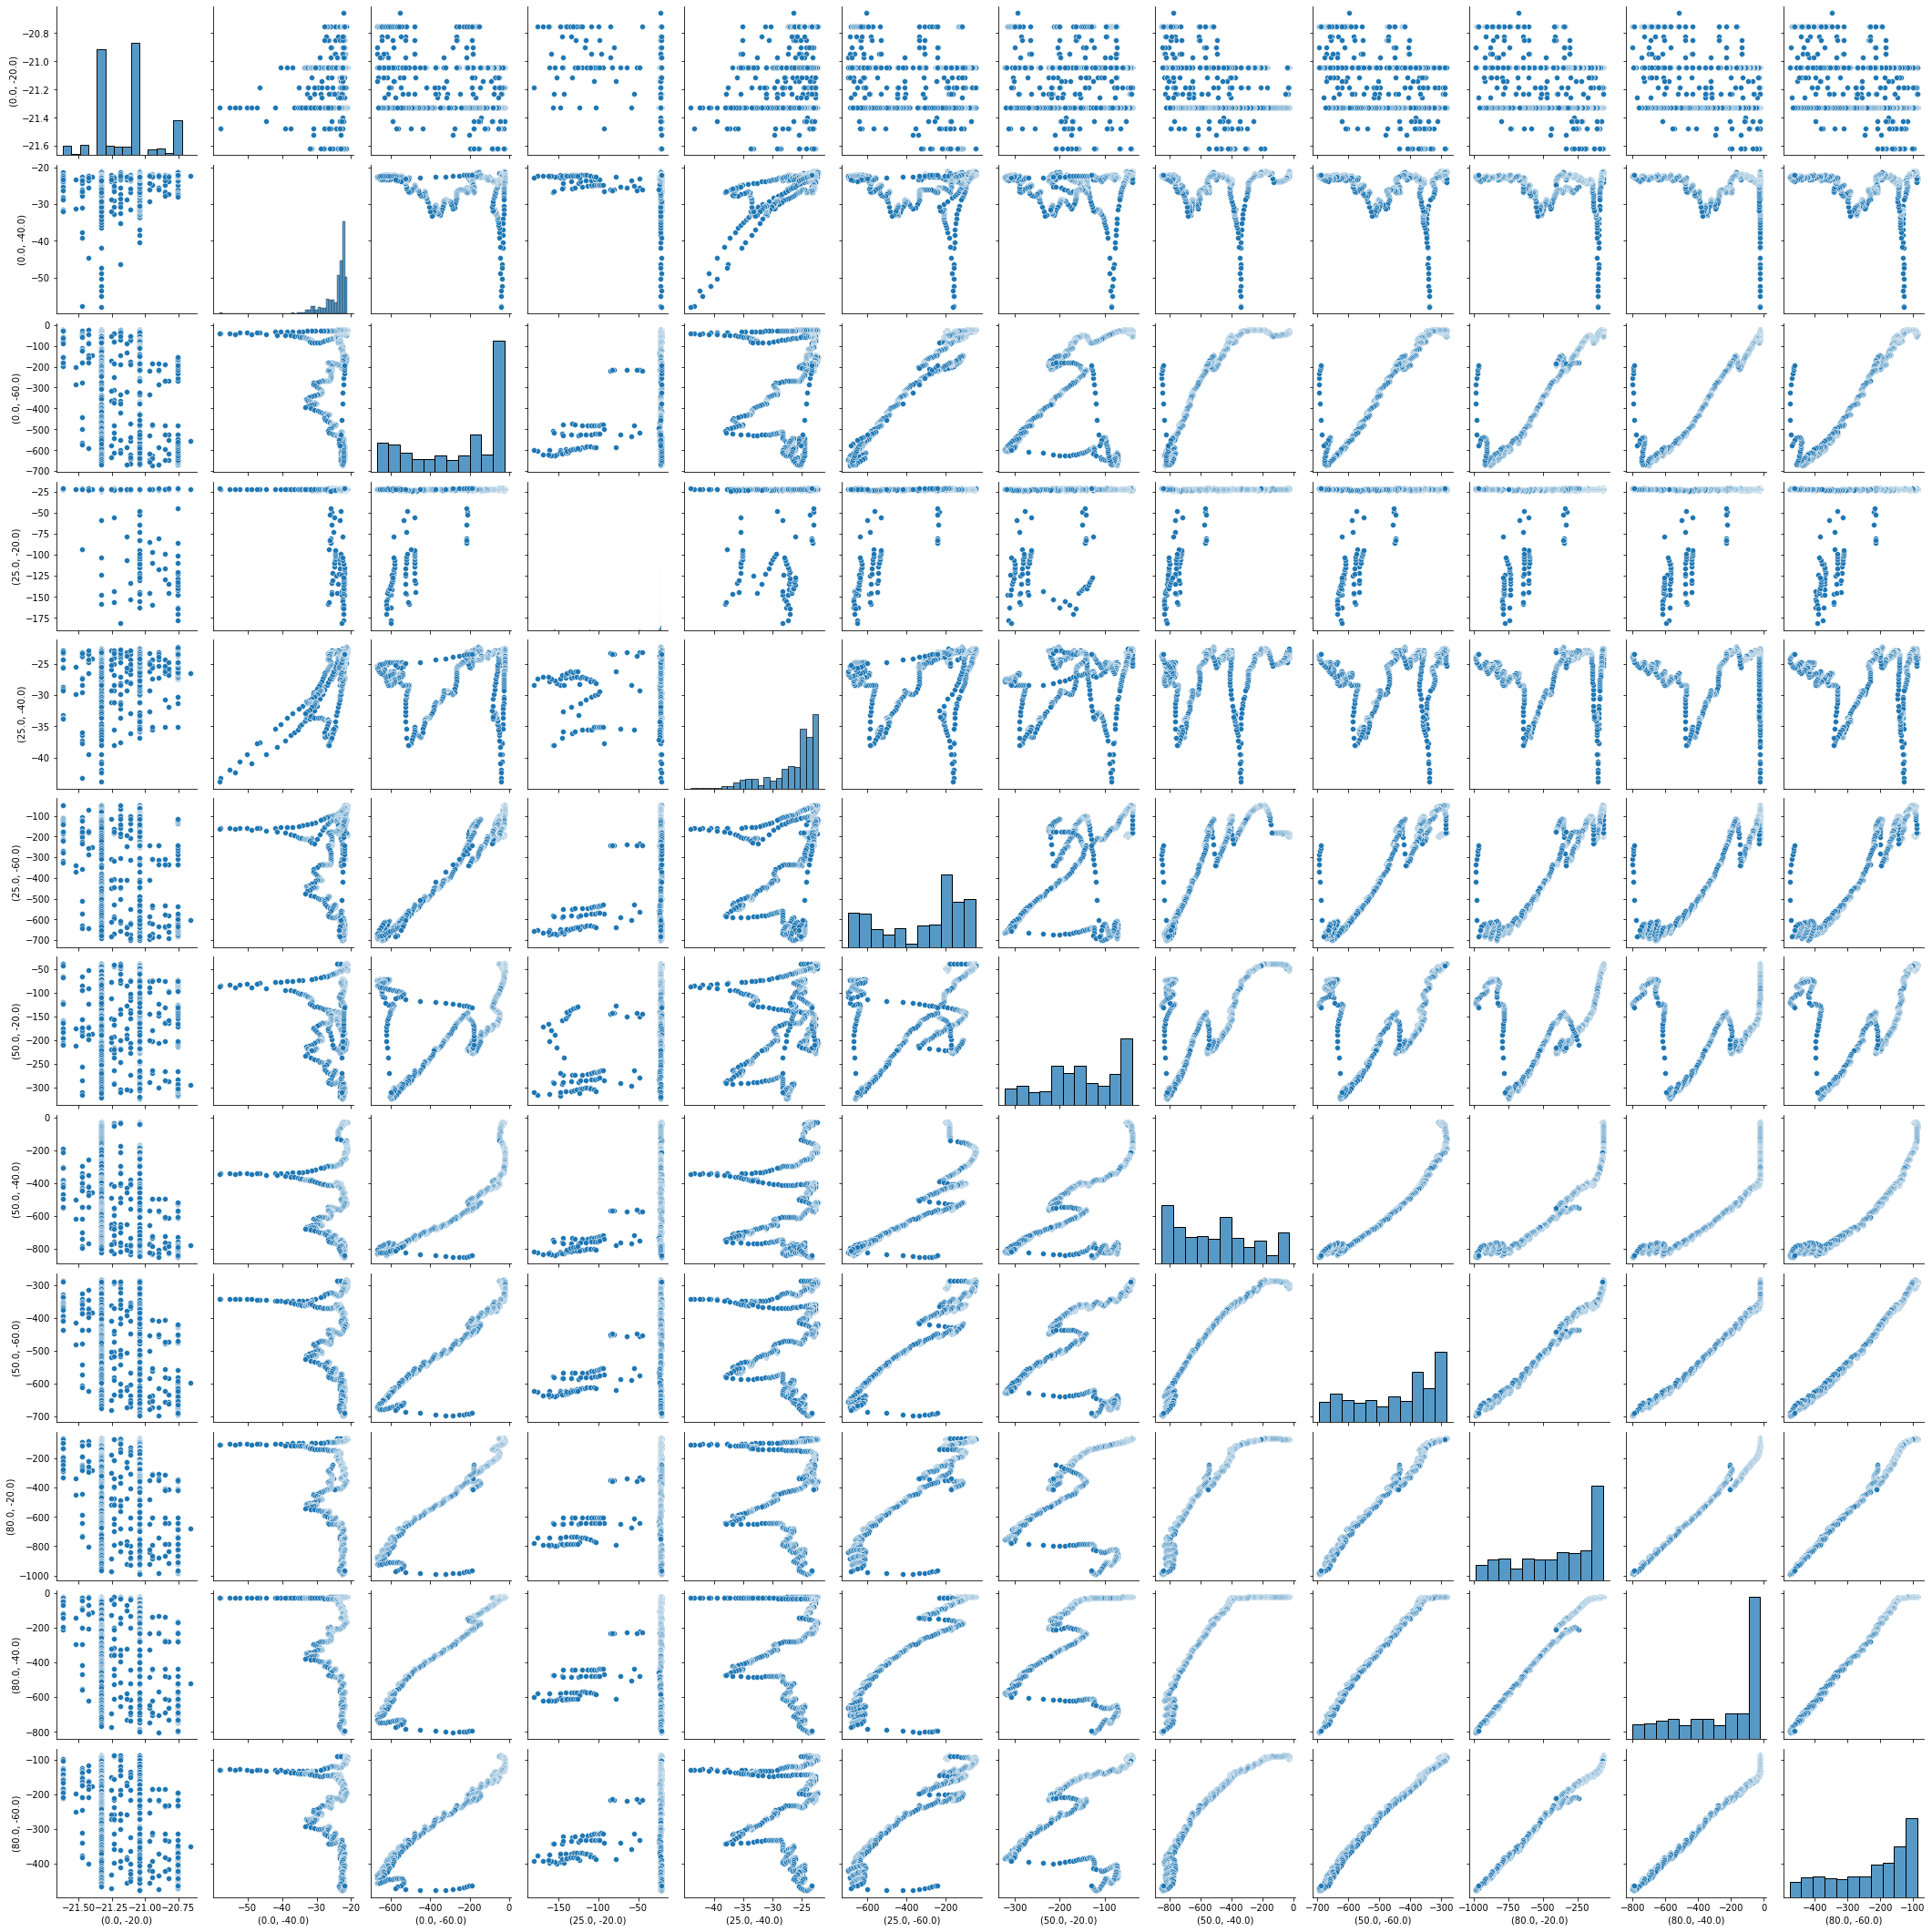

In [18]:
sns.pairplot(pdf)

In [19]:
wr.s3.to_csv(df=pdf, path=output_path + "/pivot.csv", index=False)

{'paths': ['s3://staging-clean-wateringsensors-123/pivot.csv'],
 'partitions_values': {}}